# 📘 DIS Final Exam - Fall 2022

**🎉 Welcome to DIS Final exam that takes place on the 1st of February 2023 from 15:00 to 18:00.**

> Please fill the following info:
> - Your Name: 
> - Your SCIPER:

## Answer all the parts of the exam:

- [PART 0: Rename your notebook with your SciperNo](#part0)

- [PART 1: Multiple Choice Questions - Quiz](#part1)

- [PART 2: Theory questions](#part2)

- [PART 3: Programming exercise](#part3)

    - [3.1: Parse and understand the data](#part31)
        - 3.1.1 Create the vocabulary of the documents

    - [3.2: Encode documents with Vector Space Retrieval](#part32)
        - 3.2.1 Build the term-frequency matrix.
        - 3.2.2 Build the inverse document-frequency matrix
        - 3.2.3 Vectorize input with Vector Space Model

    - [3.3: k-Nearest-Neighbors (kNN)](#part33)
        - 3.3.1 Implement kNN function
        - 3.3.2 Print k=10 closests documents to the given query
        - 3.3.3 Implement probabilistic and weigting estimation of kNN
        - 3.3.4 Compute weighting and probabilistic estimation of the given query
        - 3.3.5 Implement a Rocchio classifier
        - 3.3.6 Compute Rocchio estimation of the given query

    - [3.4: Naive Bayes Classifier](#part34)
        - 3.4.1 Compute the Naive Bayes estimation for the given query
        - 3.4.2 Discuss the difference the above classifers

    - [3.5: Association rules](#part35)
        - 3.5.1 Compute support and confidence
        - 3.5.2 Compute lift
        - 3.5.3 Explanation of implemented metrics
        
- [SUBMIT EXAM](#submit)

# 🍀 GOOD LUCK 🍀

<a id='part0'></a>
## PART 0: Rename your notebook with your SciperNo

The final sumbitted file should have the following name: `SciperNo.ipynb`

<a id='part1'></a>
## PART 1: [Multiple Choice Questions - Quiz](https://moodle.epfl.ch/mod/quiz/view.php?id=1235302)

<a id='part2'></a>
## PART 2: Theory Questions

**Given a document collection with a vocabulary consisting of three words, $V = {a,b,c}$, and two documents $d_1$ = aabc and $d_2 = abc$. The query is $q = ab$.**

> **2.1. Using standard vector space retrieval, is it possible to enforce both a ranking $d_1 > d_2$ and $d_2 > d_1$ by adding suitable documents to the collection. If yes, give examples of such documents to be added, if no, provide an argument why this cannot be the case.**

**➡️ PLEASE WRITE YOUR ANSWER HERE**

Yes, it is possible.

    d1>d2: adding d3=”b”
    d2>d1: adding d3=”c”


> **2.2. Using smoothed probabilistic retrieval (with $\lambda=0.5$), is it possible to enforce both a ranking $d_1 > d_2$ and $d_2 > d_1$ by adding suitable documents to the collection. If yes, give examples of such documents to be added, if no, provide an argument why this cannot be the case.**


**➡️ PLEASE WRITE YOUR ANSWER HERE**

Yes, it is possible.

    d1>d2: without adding any document, it holds true
    d2>d1: adding d3=”aaaa”


> **2.3. Is it possible to enforce a ranking $d_2 > d_1$ with vector space retrieval and $d_1 > d_2$ with probabilistic retrieval ($\lambda=0.5$), by adding the same documents to the collection? If yes, give examples of such documents to be added, if no, provide an argument why this cannot be the case.**

**➡️ PLEASE WRITE YOUR ANSWER HERE**

Yes, it is possible. Adding a document like d3=”c” would make d2>d1 for   VSR and d1>d2 for smoothed probabilistic retrieval.

<a id='part3'></a>
## PART 3: Programming exercise

### 💡 THE BACKSTORY

You are given a "news topic classification" dataset (`data.csv`), and the task is to apply document classification techniques you've learned during the semester. The goal is to classify news articles based on the topic they refer to.

### 📰 THE DATA

This dataset contains ~7000 samples of news articles which consists of 3 columns:

The first column is `label`, the second is `title` and the third is `description`.

The topic labels are numbered 1-4 where `1` represents topic **"World"**, `2` represents topic **"Sports"**, `3` represents **"Business"** and `4` represents **"Sci/Tech"**.

| Column     | Description                   |
|------------|-------------------------------|
| **label**  | The topic label/topic id of the article|
| **title**  | The title of the article |
| **description**  | The description of the article |


### ✅ THE TASK

You need to build a KNN and a Naive Bayes classifer to classify the articles into the 4 different categories.

<a id='part31'></a>
### 3.1: Parse and understand the data

*(1 sub-question)*

In [1]:
# Import libraries- you can additionally import any library you want.
import pandas as pd
import numpy as np
from collections import Counter
import math
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/foroutan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/foroutan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of news articles:  6994


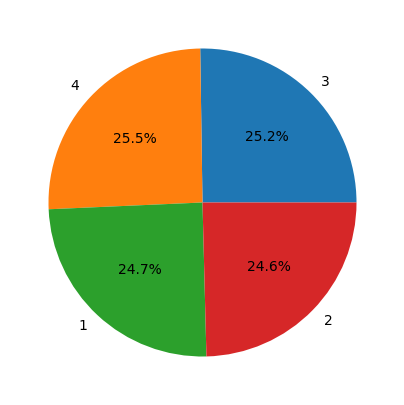

In [4]:
# Read a list of documents from a file. Each line in a file is a document
data_path = "data.csv"
data = pd.read_csv(data_path)
print("Number of news articles: ", len(data))

# Plot the distribution of topics
labels = data.label.unique()
sizes = [Counter(data.label)[i] for i in labels]
plt.figure( figsize=(5,5) )
plt.pie(sizes ,  labels=labels , autopct='%1.1f%%')
plt.show()

In [5]:
# Utility functions - NOTHING TO CHANGE HERE
stemmer = PorterStemmer()

# Tokenize, stem a document
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    return " ".join([stemmer.stem(word.lower()) for word in tokens if word not in stopwords.words('english')])

# Preprocess articles
def preprocess_text(documents):
    docs = list()
    for doc in documents:
        docs.append(tokenize(doc).split())  # tokenize
    return docs

In [6]:
# Tokenize titles of the articles 
original_documents = [doc["title"].strip() for _, doc in data.iterrows()]
tokenized_documents = preprocess_text(original_documents)
documents_topics = list(data.label)

> #### 3.1.1 Create the vocabulary of the articles.

In [7]:
def get_vocabulary_frequency(documents):
    """
    It parses the input documents and creates a dictionary with the terms and term frequencies.
    
    INPUT:
    Doc1: hello hello world
    Doc2: hello friend
    
    OUTPUT:
    {'hello': 3,
    'world': 1,
    'friend': 1}

    :param documents: list of list of str, with the tokenized documents.
    :return: dict, with keys the words and values the frequency of each word.
    """
    vocabulary = dict()
    # --------------
    # YOUR CODE HERE
    
    for document in documents:
        for word in document:
            if word in vocabulary:
                vocabulary[word] += 1
            else:
                vocabulary[word] = 1

    # --------------
    return vocabulary

In [8]:
# Create the vocabulary
vocabulary = get_vocabulary_frequency(tokenized_documents)
f"Vocabulary Size: {len(vocabulary)}"

'Vocabulary Size: 8051'

In [9]:
# print the most frequent token
voc_sorted_keys = sorted(vocabulary, key=vocabulary.get, reverse=True)
print(f"{voc_sorted_keys[0]} : {vocabulary[voc_sorted_keys[0]]}")

us : 308


<a id='part32'></a>
### PART 3.2: Encode documents with Vector Space Retrieval

*(3 sub-questions)*

In this part, we will encode/vectorize the documents using the **Vector Space Model**. 
More specifically:
- we will compute the term-frequency matrix **(tf)**
- we will compute the inverse document frequency **(idf)**
- we will vectorize/encode the articles with **tf-idf**

> #### 3.2.1 Build the term-frequency matrix

In [10]:
def get_tf(documents, vocabulary):
    """
    It creates the term-frequency matrix with rows the terms of the vocabulary and columns the number of documents.
    Each value of the matrix represents the frequency (normalized to document max frequecy) of a term (row) 
    in a document (column).
    Example:
    
    > INPUT:
    documents:
    Doc1: hello hello world
    Doc2: hello friend
    
    voc: 
    [hello, world, friend]
    
    > OUPUT:    
    [[1, 1],
    [0.5, 0],
    [0, 1]]
    
    :param documents: list of list of str, with the tokenized documents.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: np.array with the document-term frequencies
    """
    document_term_freq = np.zeros(shape=(len(vocabulary), len(documents)))
    # --------------
    # YOUR CODE HERE
    for j, document in enumerate(documents):
        counter = Counter(document)
        max_count = counter.most_common(1)[0][1]
        for i, word in enumerate(vocabulary):
            if word in counter:
                document_term_freq[i,j] = counter[word] / max_count
    # --------------
    
    return document_term_freq

In [11]:
tf = get_tf(tokenized_documents, vocabulary)
tf.shape

(8051, 6994)

> #### 3.2.2 Build the inverse document-frequency matrix (idf)

In [12]:
# compute IDF, storing idf values in a dictionary
def get_idf(vocabulary, documents):
    """
    It computes IDF scores, storing idf values in a dictionary.
    
    :param documents: list of list of str, with the tokenized tweets.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: dict with the terms as keys and values the idf for each term.
    """
    # --------------
    # YOUR CODE HERE
    idf = dict()
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents/sum(term in document for document in documents), math.e)
    # --------------
    return idf


In [13]:
idf = get_idf(vocabulary, tokenized_documents)
len(idf)

8051

> #### 3.2.3 Vectorization of input with the Vector Space Model

In [14]:
# Function to generate the vector for a document (with normalisation)
def vectorize_vsr(document, vocabulary, idf):
    """
    It takes the input text and vectorizes it based on the tf-idf formula.
    
    :param document: list of str, with the tokenized document
    :param vocabulary: dict, with the vocabulary (computed in 1.1) and each term's frequency.
    :param idf: dict, with the terms as keys and values the idf for each term.
    :return: np.array, with the vectorized document
    """
    # --------------
    # YOUR CODE HERE
    vector = np.zeros(len(vocabulary))
    term_freq = Counter(document)
    max_freq = term_freq.most_common(1)[0][1]
    for i, term in enumerate(vocabulary):
        vector[i] = idf[term] * term_freq[term]/max_freq
    # --------------
    return vector
    
vectorized_documents = np.array([vectorize_vsr(s, vocabulary, idf)  for i, s in enumerate(tokenized_documents)])
vectorized_documents.shape

(6994, 8051)

<a id='part33'></a>
### PART 3.3: k-Nearest-Neighbors (kNN)

*(7 sub-questions)*




> #### 3.3.1 Implement kNN function (finding k nearest documents for a given document)

In [15]:
def cosine_similarity(v1, v2):
    """
    It computes cosine similarity.
    
    :param v1: list of floats, with the vector of a document.
    :param v2: list of floats, with the vector of a document.
    :return: float
    """
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxy == 0:
        sim = 0
    else:
        sim = sumxy/math.sqrt(sumxx*sumyy)
    return sim

def euclidean_distance(v1, v2):
    """ It computes the euclidean distance between to vectors.
    :param v1: First vector (numpy array).
    :param v2: Second vector (numpy array).
    :return: Euclidean distance (float)
    """
    return np.linalg.norm(v1 - v2)
    
def knn(doc_vectors, query_vector, k=10):
    """ It finds the `k` nearest documents to the given query (based on euclidean distance).
    :param doc_vectors: An array of document vectors (np.array(np.array)).
    :param query_vector: Query representation (np.array)
    :return: List of document indices (list(int))
    """
    # --------------
    # YOUR CODE HERE
    dist_scores = [(i, euclidean_distance(np.array(doc), np.array(query_vector))) for i, doc in enumerate(doc_vectors)]
    dist_scores = sorted(dist_scores, key=lambda a: a[1])
    top_k_docs = [i for i in list(zip(*dist_scores[0:k]))[0]]
    # --------------
    return top_k_docs



> #### 3.3.2 Print k=10 closests documents to the given query

In [16]:
query_title = "Tiny telescope's big discovery opens new doors" # label = 4

query = tokenize(query_title).split()
query_vectors = vectorize_vsr(query, vocabulary, idf)

top_k_docs = knn(vectorized_documents, query_vectors[0])

for k, doc_index in enumerate(top_k_docs):
    print(f"{k+1} : {original_documents[doc_index]}")

1 : Microsoft Patches the Patch
2 : SpaceShipOne: One down, one to go
3 : Oracle, PeopleSoft
4 : Olympics: Party, Party, Party - Greece's Parting Gift
5 : Oil, stocks both rise
6 : Names in the Game
7 : Missed target
8 : To finish first, first be Finnish
9 : Three into two
10 : How to keep oil flowing? Invest, invest, invest (AFP)


> #### 3.3.3 Implement probabilistic and weigting estimation of kNN 

In [17]:
def knn_weighting_estimate(doc_vectors, doc_labels, query_vector, k=10):
    """ Weighting estimation for kNN classification
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :param query_vector: Query vector (np.array)
    :param k: Number of nearest neighbors to retrieve
    
    :return: A dictionary containing the estimation (sorted) score for each label/topic (dict)
    """
    # --------------
    # YOUR CODE HERE
    top_k_doc_indices = knn(doc_vectors, query_vector, k)
    top_k_labels = [doc_labels[i] for i in top_k_doc_indices]

    scores = {t:0 for t in list(set(doc_labels))}
    for i in top_k_doc_indices:
        scores[doc_labels[i]] += cosine_similarity(query_vector, doc_vectors[i])
    # --------------
    return scores

def knn_probabilistic_estimate(doc_vectors, doc_labels, query_vector, k=10):
    """ Probabilistic estimation for kNN classification
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :param query_vector: Query vector (np.array)
    :param k: Number of nearest neighbors to retrieve
    
    :return: A dictionary containing the estimation (sorted) score for each label/topic (dict)
    """
    # --------------
    # YOUR CODE HERE
    top_k_doc_indices = knn(doc_vectors, query_vector, k)
    top_k_labels = [doc_labels[i] for i in top_k_doc_indices]

    scores = {t:0 for t in list(set(doc_labels))}
    for i in top_k_doc_indices:
        scores[doc_labels[i]] += 1

    scores = {t:scores[t] / k for t in scores}
    # --------------
    return scores


> #### 3.3.4 Compute weighting and probabilistic estimation of the given query

In [18]:
# query_titles = [("Hundreds laid off at Fleet offices", 3), ("Stuttgart Closing on Qualification", 2), ("Shoppach doesn't appear ready to hit the next level", 2)]
query_titles = [("Airlines Agree to Cut Flights at Chicago O'Hare", 3), ("Stuttgart Closing on Qualification", 2)]
# query_titles = [("After Wait, Google Set for Market Debut", 3), ("Stuttgart Closing on Qualification", 2)]
# query_titles = [("Republican Convention Light on Stars", 1)]
queries = [tokenize(q[0]).split() for q in query_titles] 
query_vectors = [vectorize_vsr(q, vocabulary, idf) for q in queries]
k = 10

for i, query_v in enumerate(query_vectors):
    print(f"Query: {query_titles[i]}")
    w_estimate = knn_weighting_estimate(vectorized_documents, documents_topics, query_v, k)
    w_estimate = sorted(w_estimate.items(), key=lambda x: x[1], reverse=True)
    print(f"Weighting estimate: {w_estimate}")
   
    prob_estimate = knn_probabilistic_estimate(vectorized_documents, documents_topics, query_v, k)
    prob_estimate = sorted(prob_estimate.items(), key=lambda x: x[1], reverse=True)
    print(f"Probabilistic estimate: {prob_estimate}")

    print("*************************************************\n")

Query: ("Airlines Agree to Cut Flights at Chicago O'Hare", 3)
Weighting estimate: [(3, 0.40466850242282926), (1, 0), (2, 0), (4, 0)]
Probabilistic estimate: [(2, 0.4), (3, 0.4), (4, 0.2), (1, 0.0)]
*************************************************

Query: ('Stuttgart Closing on Qualification', 2)
Weighting estimate: [(3, 0.2870546649144036), (2, 0.266082291031066), (4, 0.26170928796986676), (1, 0)]
Probabilistic estimate: [(2, 0.4), (3, 0.3), (4, 0.3), (1, 0.0)]
*************************************************



> #### 3.3.5 Compute weighting and probabilistic estimation of the given query for different values of `k`:

Discuss the changes in the results by increasing the value of `k`

In [19]:
# KNN estimation for different values of k (first query)
for k in [1, 5, 10, 15, 20]:
    w_estimate = knn_weighting_estimate(vectorized_documents, documents_topics, query_vectors[0], k)
    w_estimate = sorted(w_estimate.items(), key=lambda x: x[1], reverse=True)
    w_label = w_estimate[0][0]

    prob_estimate = knn_probabilistic_estimate(vectorized_documents, documents_topics, query_vectors[0], k)
    prob_estimate = sorted(prob_estimate.items(), key=lambda x: x[1], reverse=True)
    p_label = prob_estimate[0][0]

    print(f"k: {k}, w_label = {w_label}, p_label: {p_label}")

k: 1, w_label = 1, p_label: 4
k: 5, w_label = 3, p_label: 3
k: 10, w_label = 3, p_label: 2
k: 15, w_label = 3, p_label: 3
k: 20, w_label = 3, p_label: 3


**➡️ PLEASE WRITE YOUR ANSWER HERE**


> #### 3.3.6 Implement a Rocchio classifier

In [20]:
def rocchio_estimate(doc_vectors, doc_labels, query_vector):
    """ 
    Rocchio classification
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :param query_vector: Query vector (np.array)
    
    :return: A dictionary containing the estimation score for each label/topic (dict)
    """
    # --------------
    # YOUR CODE HERE
    topic_to_doc = {t:[] for t in list(set(doc_labels))}
    for i, doc in enumerate(doc_vectors):
        topic_to_doc[doc_labels[i]].append(np.array(doc))

    centroids = {t:sum(topic_to_doc[t]) / len(topic_to_doc[t]) for t in topic_to_doc}
    scores = {t:euclidean_distance(centroids[t], query_vector) for t in centroids}
    # --------------
    return scores


> #### 3.3.7 Compute Rocchio estimation of the given query

In [21]:
roc_estimate = rocchio_estimate(vectorized_documents, documents_topics, query_vectors[0])
roc_estimate = sorted(roc_estimate.items(), key=lambda x: x[1])
print(f"Rocchio estimate: {roc_estimate}")

Rocchio estimate: [(3, 13.007451557333788), (4, 13.07197927312842), (2, 13.084889489152548), (1, 13.08623713524477)]


<a id='part34'></a>
### PART 3.4: Naive Bayes Classifier

*(2 sub-questions)*

In [22]:
# Naive Bayes Classifier
def get_topic_tf(doc_vectors, doc_labels, vocabulary):
    """ It computes term frequency for each topic/label
    :param doc_vectors: Document vectors (np.array(np.array))
    :param doc_labels: Document labels/topics (list)
    :vocabulary: A dictionary, with keys the words and values the frequency of each word.
    :return: A dictionary, with keys the topics/labels and values a dictionary of word frequencies  
    """
    topic_term_freq = {t:{w:0 for w in vocabulary} for t in list(set(doc_labels))}
    for i, doc in enumerate(doc_vectors):
        counter = Counter(doc)
        for word in vocabulary:
            if word in counter:
                topic_term_freq[doc_labels[i]][word] += counter[word]
    return topic_term_freq

> #### 3.4.1 Compute the Naive Bayes estimation for the given query

In [23]:
def navie_bayes_classifier(tf_dict, query, topics_probs):
    """ Naive Bayes classification
    :param tf_dict: A dictionary, with keys the topics/labels and values a dictionary of word frequencies  
    :param query: Query vector
    :param topics_probs: Probaility distribution of each topic/label (dict)
    :return: A dictionary containing the log probability estimation for each topic
    """
    # --------------
    # YOUR CODE HERE
    log_probabilities = {t:0 for t in tf_dict}
    for topic in tf_dict:
        prob = 0
        for word in query:
            if word in tf_dict[topic]: 
                pw = (tf_dict[topic][word] + 1) / (sum([tf_dict[t][word] for t in tf_dict]) + 1)
                prob += math.log(pw)

        prob += math.log(topics_probs[topic])
        log_probabilities[topic] = prob
    # --------------
    return log_probabilities

In [24]:
# Compute the probability distribution of topics/labels
topics_freq = Counter(documents_topics)
topics_probs = {t:topics_freq[t]/len(documents_topics) for t in topics_freq}
# Compute word frequency per topic
tf_dict = get_topic_tf(tokenized_documents, documents_topics, vocabulary)

nb_estimation = navie_bayes_classifier(tf_dict, queries[0], topics_probs)
nb_estimation = sorted(nb_estimation.items(), key=lambda x: x[1], reverse=True)
print(f"Naive Bayes Estimation: {nb_estimation}")

Naive Bayes Estimation: [(3, -4.8294503149491845), (4, -9.900134971426137), (1, -10.153488856666009), (2, -12.556024509020881)]


> #### 3.4.2 Discuss the difference the above classifers:
1. Which kNN classifer is more accurate? Weighting or probabilistic estimation? Why?
2. What is the difference between Rocchio and kNN classification?
3. When Naive Bayes is prefered over kNN? 



**➡️ PLEASE WRITE YOUR ANSWER HERE**



<a id='part35'></a>
### PART 3.5: Association Rules
*(3 sub-questions)*

Now we would like to identify frequent rules that govern how words appear together in the news article **titles**.

Using the `tokenized_documents` provided before and by considering the pair of words containing _"microsoft"_ (we only consider rules of size 2) do the following:

* Compute **support** and **confidence** for the rules `microsoft` -> `X`, where X is a word appearing with microsoft in the title of an article.
* From the confidence of the rules you obtained, compute **lift**.

> **3.5.1 Compute support and confidence for the rules `microsoft` -> `X`, where X is a word appearing with microsoft in the title of an article.**

In [25]:
# --------------
# YOUR CODE HERE

# support    = {}
# confidence = {}
import copy 

# find documents that 'microsoft' appears
docs_with_microsoft = list()
for document in tokenized_documents:
    if 'microsoft' in document:
        docs_with_microsoft.append(document)
        
# find the frequency of word 'microsoft'
frequency_of_microsoft = len(docs_with_microsoft)

#copy vocabulary (to leave the original intact) and remove the microsoft frequency
vocabulary_c = copy.deepcopy(vocabulary)
vocabulary_c.pop('microsoft')

# compute support and confidence for each word in vocabulary
support = dict()
confidence = dict()
for word in vocabulary_c:
    frequency_of_microsoft_x = 0
    for document in docs_with_microsoft:
        if word in document:
            frequency_of_microsoft_x += 1
    
    support[word] = frequency_of_microsoft_x / len(tokenized_documents)
    confidence[word] = frequency_of_microsoft_x / frequency_of_microsoft
# --------------

> **3.5.2 From the confidence of the rules you obtained, compute lift.**

In [26]:
# --------------
# YOUR CODE HERE

# Compute the lift
lift = dict()
for word in vocabulary_c:
    lift[word] = confidence[word] / (vocabulary[word] / len(tokenized_documents))
# --------------

In [27]:
# Show the 3 rules with highest support
{k: v for k, v in sorted(support.items(), key=lambda item: item[1], reverse=True)[:3]}

{'search': 0.0014297969688304261,
 'window': 0.0012868172719473834,
 'music': 0.0012868172719473834}

In [28]:
# Show the 3 rules with highest confidence
{k: v for k, v in sorted(confidence.items(), key=lambda item: item[1], reverse=True)[:3]}

{'search': 0.06493506493506493,
 'window': 0.05844155844155844,
 'music': 0.05844155844155844}

In [29]:
# Show the 3 rules with highest lift
{k: v for k, v in sorted(lift.items(), key=lambda item: item[1], reverse=True)[:3]}

{'hotmail': 45.41558441558441,
 '2003': 45.41558441558441,
 'beta': 45.41558441558441}

## 🔚 END OF EXAM
> Don't forget to change the submitted file with your SciperNo as the file name before submitting.

<a id='submit'></a>
#### [SUBMIT HERE](https://moodle.epfl.ch/mod/quiz/view.php?id=1235303)